<h1>Car Price Predicting System using Machine Learning</h1>


<h2><u>Group No-05</u></h2>
<h3>EG/2017/3111 - Dissanayake S.D.L.K.</h3>
<h3>EG/2017/3238 - Chularathna W.A.R.S</h3>
 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading data sets

train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB


In [4]:
train_data.head()

,Unnamed: 0,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
train_data.tail()

,Unnamed: 0,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [6]:
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
train_data.shape

(6019, 12)

In [9]:
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [10]:
train_data.isnull().sum()

Name                    0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
#Droping rows if null values appeared

print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 12)


In [12]:
#Now the total datset have only 5975 rows

train_data = train_data.reset_index(drop=True)

<h3>Feature Engineering</h3>

In [13]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [14]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [15]:
#At this point when we tried to change Power(bhp) to float an error occured (Can't convert str to float : null). So, we started investigating. 
#And found some cell where having values: 'null bhp'

train_data['Power'][76]

'null bhp'

In [17]:
#Then we found the indexes of these values and removed them.
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [18]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [19]:
train_data.shape

(5872, 16)

In [20]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [21]:
train_data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [22]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [23]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [24]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Seats              5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Company            5872 non-null   object 
 8   Mileage(km/kg)     5872 non-null   float64
 9   Engine(CC)         5872 non-null   float64
 10  Power(bhp)         5872 non-null   float64
 11  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 550.6+ KB


In [26]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

<h3>Data Visualization</h3>

D:\Set up\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

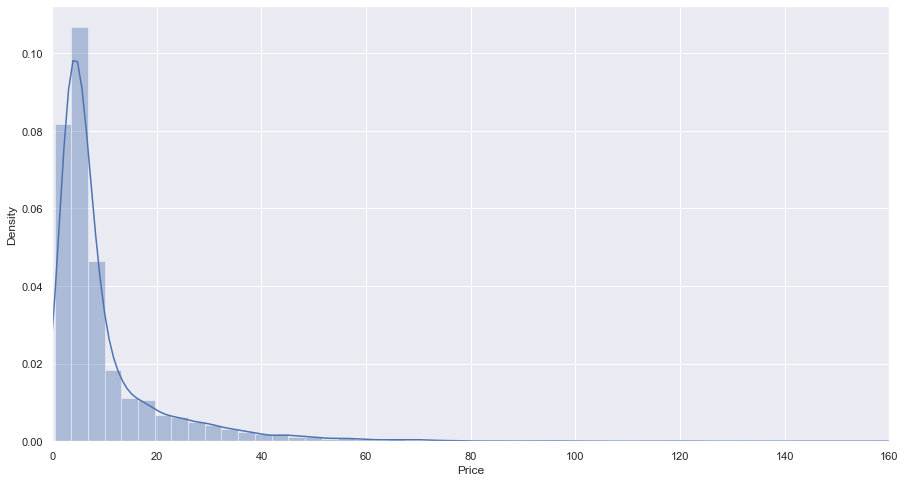

In [27]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])


In [28]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

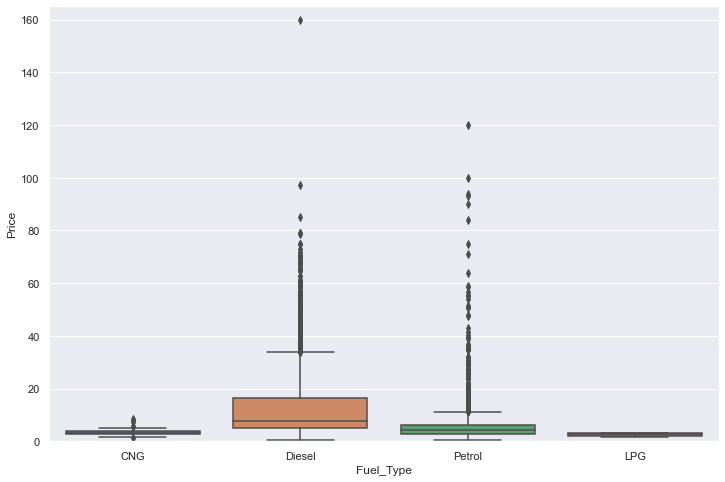

In [29]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

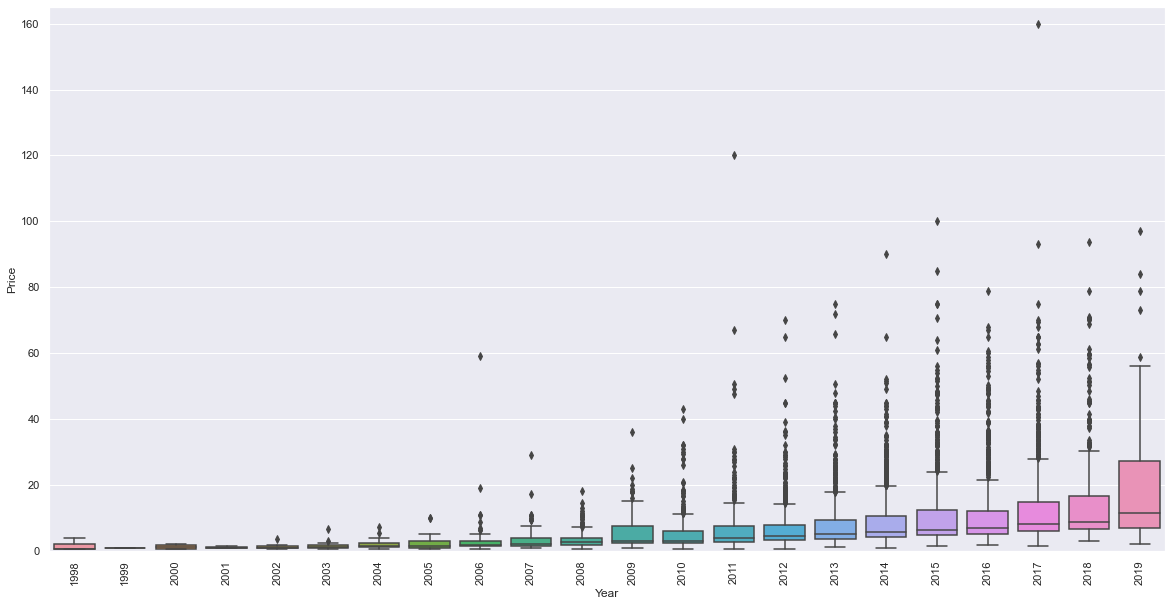

In [30]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

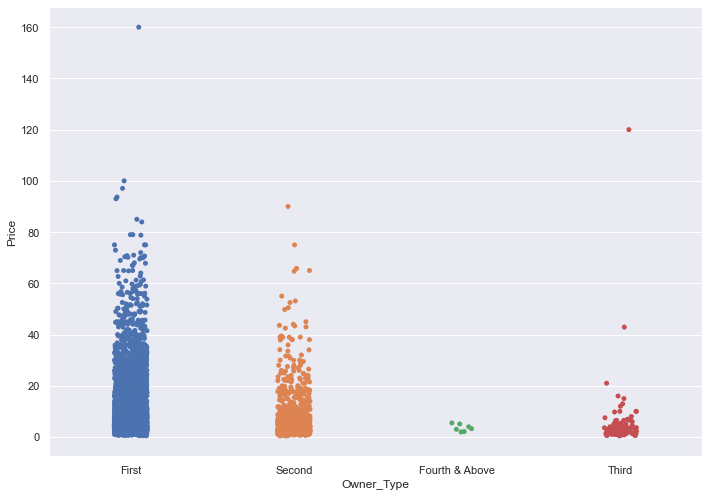

In [31]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data) 

<Figure size 1440x720 with 0 Axes>

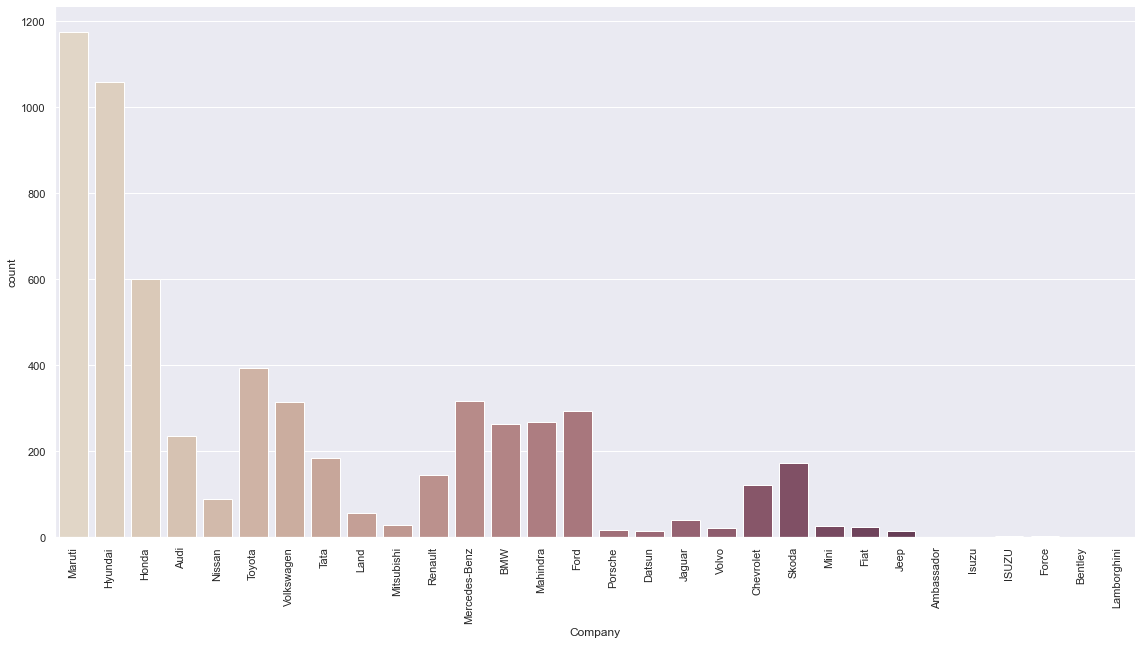

In [32]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

In [33]:
var = 'Fuel_Type'
train_data[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

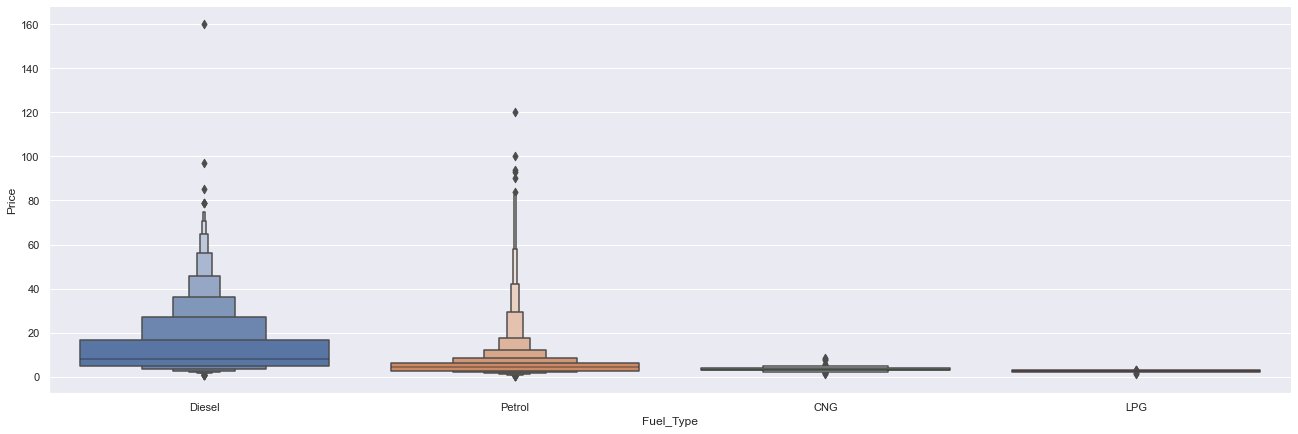

In [34]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [35]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [36]:
var = 'Transmission'
train_data[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

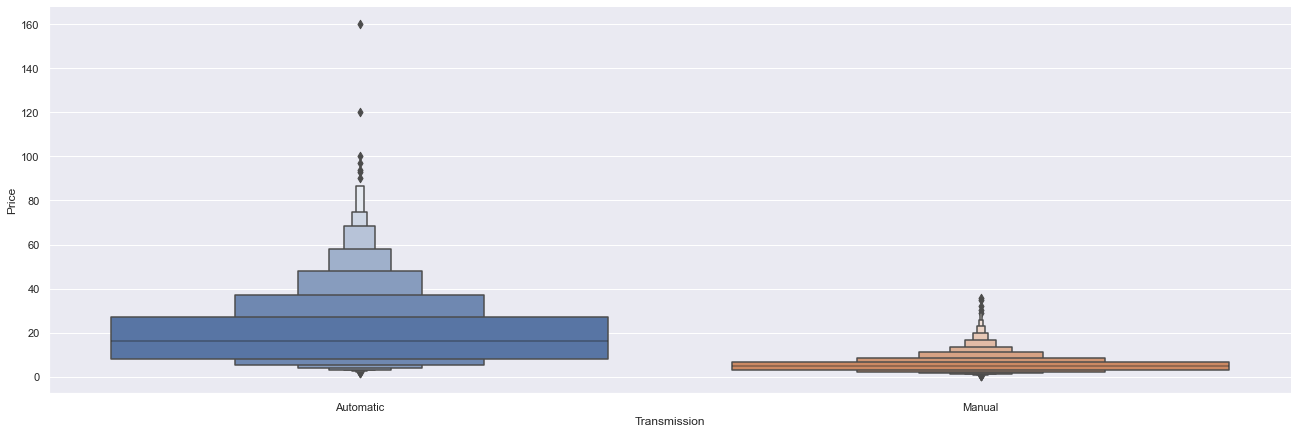

In [37]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [38]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [39]:
var = 'Owner_Type'
train_data[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [40]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [41]:
var = 'Company'
train_data[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Lamborghini         1
Isuzu               1
Bentley             1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

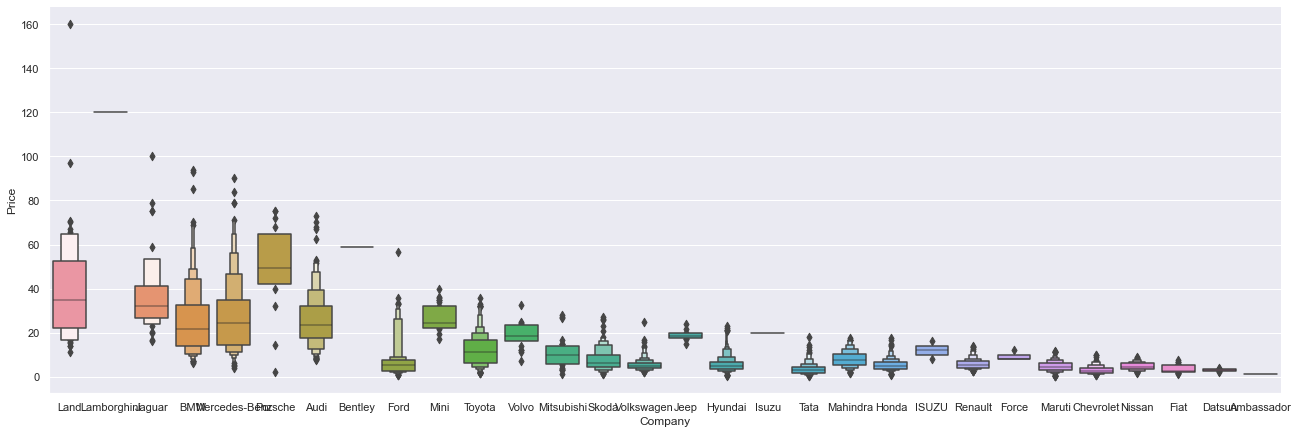

In [42]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [43]:
train_data.drop(["Company"],axis=1,inplace=True)

In [44]:
final_train= pd.concat([train_data,Fuel_t,Transmission],axis=1)
final_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,58.16,NaN,0,0,0,1
1,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,126.20,NaN,1,0,0,1
2,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,88.70,8.61,0,0,1,1
3,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,88.76,NaN,1,0,0,1
4,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,140.80,NaN,1,0,0,0


In [45]:
final_train.drop(["Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,1,0,0,0


In [46]:
final_train.shape

(5872, 12)

<h3>Preparing Test Data</h3>

In [47]:
test_data.head()

,Unnamed: 0,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [48]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)



var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)


Shape of test data Before dropping any Row:  (5872, 11)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 11)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 11)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 11)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 11)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 11)


In [49]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,1,0,0,1


<h3>Final Features Selection</h3>

In [50]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [51]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape
X.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,1,0,0,0


In [52]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


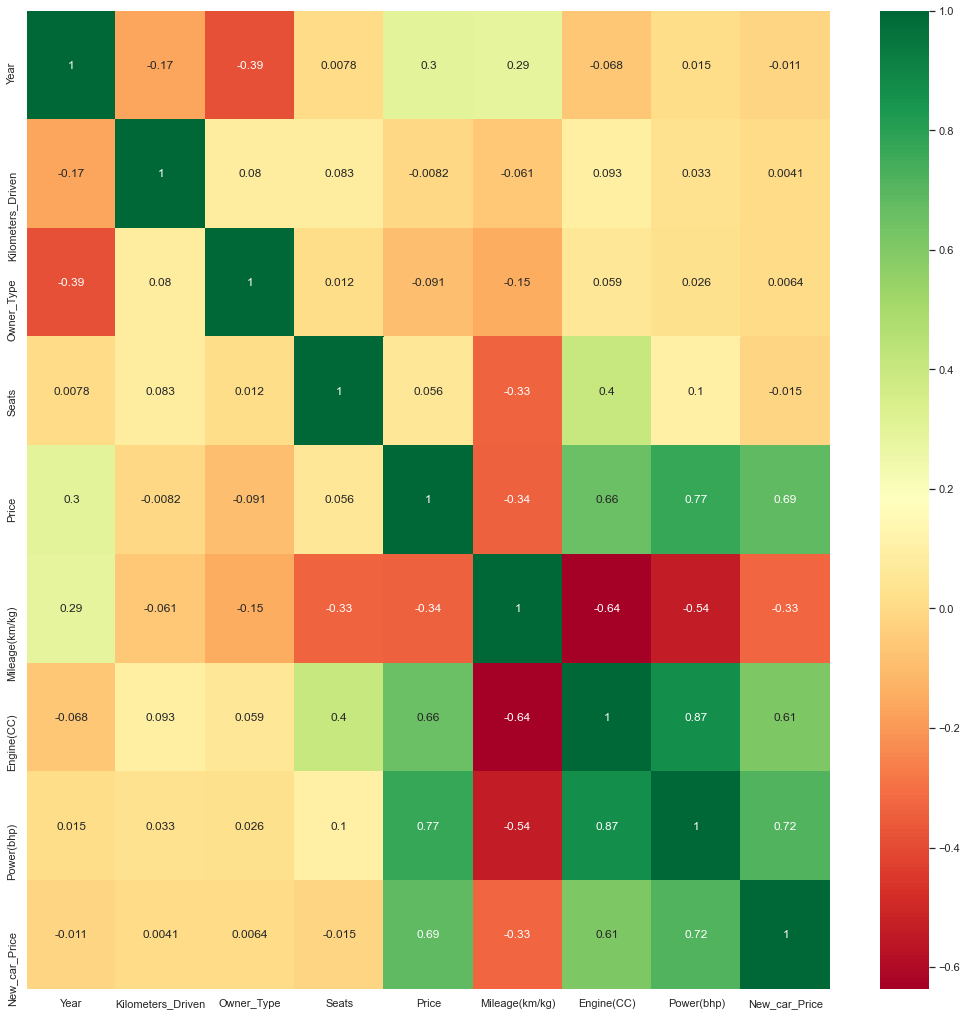

In [53]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

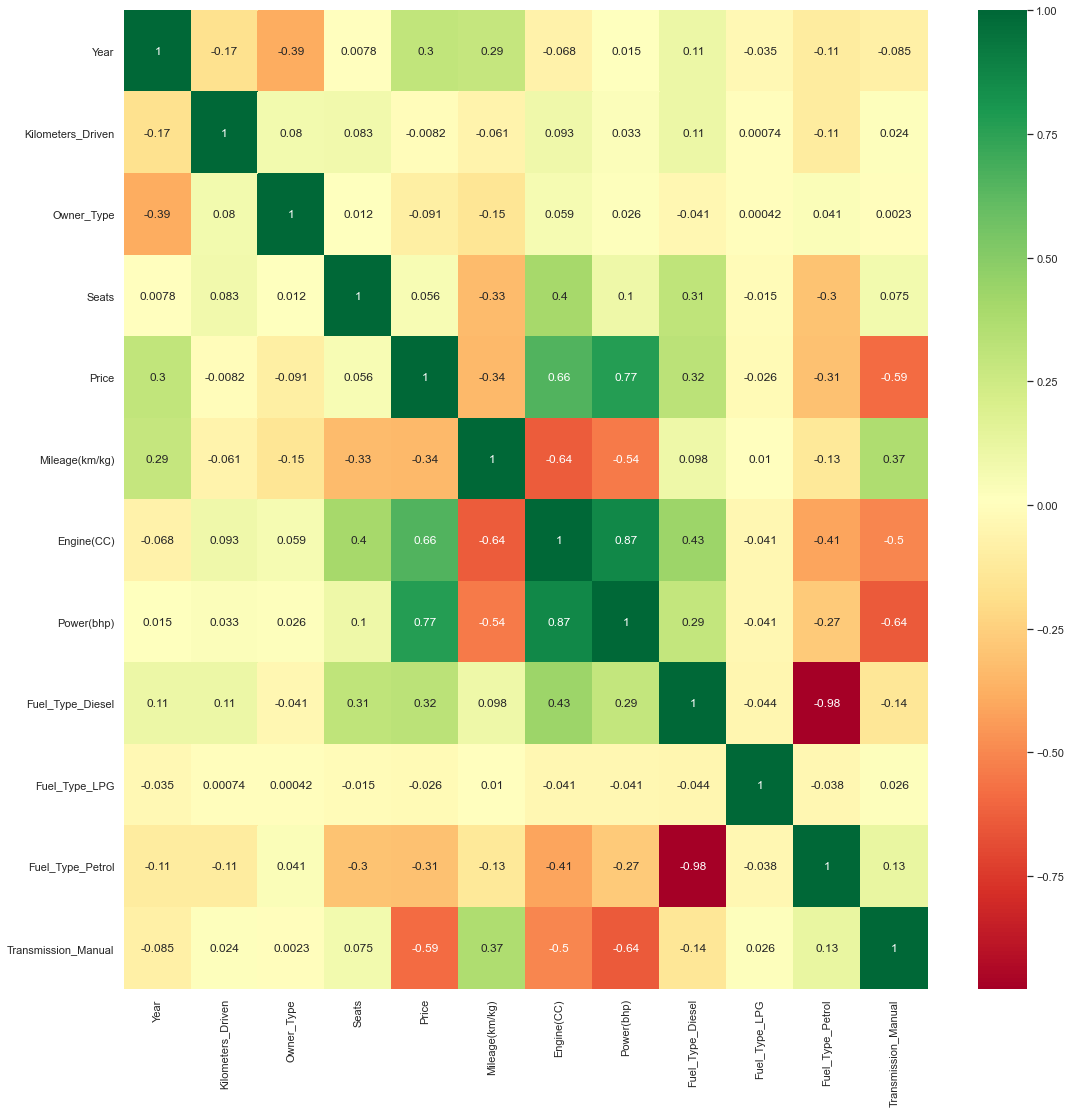

In [54]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

<h3>Machine Learning Model</h3>

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [56]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  1.0
Accuracy on Testing set:  1.0


<h3>Error Calculation</h3>

In [57]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  3.61592647077535e-13
Mean Squared  Error      :  2.0790441392311424e-25
Root Mean Squared  Error :  4.559653648284201e-13
R Squared Error          :  1.0


<h3>Final Result as a plot</h3>

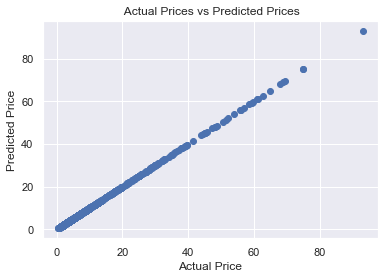

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()